In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

32.80998180044905 -106.69019892487184
-81.96126527287271 56.99175060090508
-84.47164256832163 53.646723747230624
43.587749863787366 46.37469162917614
30.74128341874146 -12.672453697637053
-47.59584009885082 -55.156921241186126
-22.566007302261795 -72.20390829346563
22.18528036586322 -21.610606138626906
-0.7114850361753042 -143.48805329105937
-35.77329866822817 56.62805788459423
41.6177718528823 33.908127221022966
-40.56981625888319 -160.75438130140626
-70.41673348117601 134.20195964561435
-71.1570794966586 -12.741190150591962
37.36876960748218 167.94867141425254
1.8557706418296789 28.15658359547851
28.723170286579332 -124.58478860479141
-14.891027238018793 -28.221318464964355
-81.33136544500546 120.33832479080917
-10.032932643299844 -40.32544449784305
51.705800497223464 102.6344846978825
-19.732944159304466 -129.49068969959689
77.56559591744724 104.60089039318314
-72.4295444133447 -25.903089557967718
-79.7913049955637 -139.46434585482737
8.491864084351647 166.371076166666
-34.652254122

-5.862661687827526 -14.587887964731152
1.1678137800496984 24.12159389717388
81.82151112096875 123.31564306982693
3.2173480020693717 -59.448682176416156
-79.86534817894646 86.8496168641907
65.0343242595741 -138.1487889783207
-51.94912124891165 49.91509603847848
-1.3695396416506185 26.64711262830886
18.343766180002902 -136.36495041374684
-31.902823532204593 144.4717300604903
15.041410566678692 -169.17260325614365
-22.711319568129497 -178.3729409932213
-43.08181876522486 31.255577906254985
-81.76848992837384 48.74575492565597
-37.44372658242995 130.3141450528051
3.5755972316147364 152.4259042883392
-15.616956783968675 134.52929551213936
-18.254464422399877 -146.1483184280785
17.020765127027488 -63.74279601917422
-5.086701601073045 102.7794889078342
42.82282490436003 -48.90960696897304
-68.14173401252796 171.06635820369195
-62.98236158082212 147.32074325257554
-48.756880628917116 120.9544239155884
-26.106672782088822 79.71566820617608
-38.91631406414902 -177.39115588790844
-49.468565000357

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | las cruces
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | grebenskaya
Processing Record 5 of Set 1 | teguise
Processing Record 6 of Set 1 | necochea
Processing Record 7 of Set 1 | tocopilla
Processing Record 8 of Set 1 | nouadhibou
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | kastamonu
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | wamba
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | maragogi
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | jaguarari
Processing Record 21 of Set 1 | kyren
Processing Record 22 of Set 1 | rikitea
Processi

Processing Record 40 of Set 4 | balkhash
Processing Record 41 of Set 4 | takoradi
Processing Record 42 of Set 4 | lake havasu city
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | chissamba
Processing Record 46 of Set 4 | hokitika
Processing Record 47 of Set 4 | awbari
Processing Record 48 of Set 4 | mangan
Processing Record 49 of Set 4 | banda aceh
Processing Record 50 of Set 4 | bam
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | horasan
Processing Record 3 of Set 5 | funtua
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | rajgarh
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | okhotsk
Processing Record 8 of Set 5 | chiang klang
Processing Record 9 of Set 5 | tchollire
Processing Record 10 of Set 5 | zhezkazgan
Processing Record 11 of Set 5 | gorontalo
Processing Record 12 of Set 5 | longyearbyen
Processing Record 13 of Set 5 | ranong
Proces

Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | ofaqim
Processing Record 31 of Set 8 | wageningen
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | qiyang
Processing Record 34 of Set 8 | tignere
Processing Record 35 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 36 of Set 8 | bambanglipuro
Processing Record 37 of Set 8 | sazonovo
Processing Record 38 of Set 8 | datteln
Processing Record 39 of Set 8 | oranjemund
Processing Record 40 of Set 8 | gazni
City not found. Skipping...
Processing Record 41 of Set 8 | arraial do cabo
Processing Record 42 of Set 8 | wairoa
Processing Record 43 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 44 of Set 8 | basoko
Processing Record 45 of Set 8 | culebra
Processing Record 46 of Set 8 | mogadishu
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Set 8 | sobolevo
Processing Record 50 of Set 8 | port mores

Processing Record 13 of Set 12 | snyder
Processing Record 14 of Set 12 | azuaga
Processing Record 15 of Set 12 | sarkand
Processing Record 16 of Set 12 | bend
Processing Record 17 of Set 12 | ordzhonikidze
Processing Record 18 of Set 12 | caxito
Processing Record 19 of Set 12 | fare
Processing Record 20 of Set 12 | grand-lahou
Processing Record 21 of Set 12 | southbridge
Processing Record 22 of Set 12 | mingshui
Processing Record 23 of Set 12 | gogrial
Processing Record 24 of Set 12 | ketchikan
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | bilibino
Processing Record 27 of Set 12 | roma
Processing Record 28 of Set 12 | pontes e lacerda
Processing Record 29 of Set 12 | vigrestad
Processing Record 30 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 12 | namibe
Processing Record 32 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 33 of Set 12 | agadez
Processing Record 34 of Set 12 | riachao das neves
Proces

In [11]:
len(city_data)

579

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Las Cruces,32.3123,-106.7783,99.19,18,18,9.82,US,2022-07-23 22:29:05
1,East London,-33.0153,27.9116,58.28,65,77,18.45,ZA,2022-07-23 22:29:05
2,Port Alfred,-33.5906,26.8910,56.68,71,94,22.06,ZA,2022-07-23 22:29:06
3,Grebenskaya,43.5317,46.3733,65.08,90,100,9.08,RU,2022-07-23 22:29:06
4,Teguise,29.0605,-13.5640,70.54,80,92,8.37,ES,2022-07-23 22:29:06
5,Necochea,-38.5473,-58.7368,54.00,86,92,3.02,AR,2022-07-23 22:29:07
6,Tocopilla,-22.0920,-70.1979,62.56,73,17,6.85,CL,2022-07-23 22:29:07
7,Nouadhibou,20.9310,-17.0347,69.57,94,22,12.06,MR,2022-07-23 22:29:07
8,Atuona,-9.8000,-139.0333,77.50,76,33,18.10,PF,2022-07-23 22:29:08
9,Kastamonu,41.5000,33.6667,52.11,87,0,2.57,TR,2022-07-23 22:29:08


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Las Cruces,US,2022-07-23 22:29:05,32.3123,-106.7783,99.19,18,18,9.82
1,East London,ZA,2022-07-23 22:29:05,-33.0153,27.9116,58.28,65,77,18.45
2,Port Alfred,ZA,2022-07-23 22:29:06,-33.5906,26.8910,56.68,71,94,22.06
3,Grebenskaya,RU,2022-07-23 22:29:06,43.5317,46.3733,65.08,90,100,9.08
4,Teguise,ES,2022-07-23 22:29:06,29.0605,-13.5640,70.54,80,92,8.37
5,Necochea,AR,2022-07-23 22:29:07,-38.5473,-58.7368,54.00,86,92,3.02
6,Tocopilla,CL,2022-07-23 22:29:07,-22.0920,-70.1979,62.56,73,17,6.85
7,Nouadhibou,MR,2022-07-23 22:29:07,20.9310,-17.0347,69.57,94,22,12.06
8,Atuona,PF,2022-07-23 22:29:08,-9.8000,-139.0333,77.50,76,33,18.10
9,Kastamonu,TR,2022-07-23 22:29:08,41.5000,33.6667,52.11,87,0,2.57


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

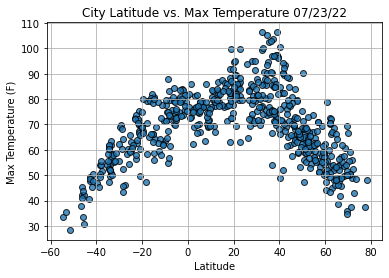

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

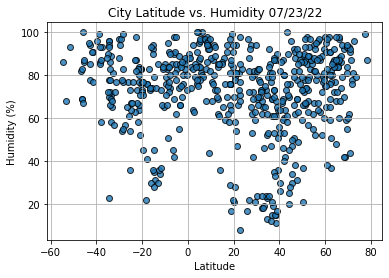

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

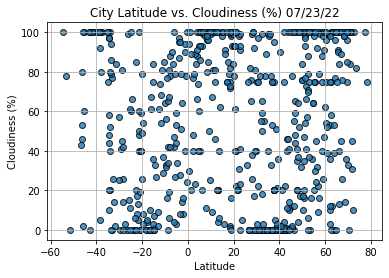

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

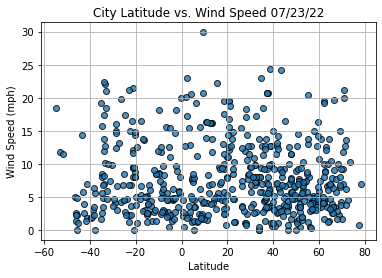

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()